<a href="https://colab.research.google.com/github/yeesem/Deep_Learning/blob/main/Siamese_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Flatten,Dense, Dropout,Lambda
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.keras import backend as k

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image,ImageFont,ImageDraw
import random

# Prepare Dataset

In [25]:
def create_pairs(x,digit_indices):
  pairs = []
  labels = []
  n = min([len(digit_indices[d]) for d in range(10)]) - 1

  for d in range(10):
    for i in range(n):
      z1,z2 = digit_indices[d][i],digit_indices[d][i+1]
      pairs += [[x[z1],x[z2]]]
      # generate a random integer between 1 and 9
      inc = random.randrange(1,10)
      dn = (d + inc) % 10
      z1,z2 = digit_indices[d][i],digit_indices[dn][i]
      pairs += [[x[z1],x[z2]]]
      labels += [1,0]

  return np.array(pairs),np.array(labels)

def create_pairs_on_set(images, labels):

    digit_indices = [np.where(labels == i)[0] for i in range(10)]
    pairs, y = create_pairs(images, digit_indices)
    y = y.astype('float32')

    return pairs, y


def show_image(image):
  plt.figure()
  plt.imshow(image)
  plt.colorbar()
  plt.grid(False)
  plt.show()

In [26]:
# load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# prepare train and test sets
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# normalize values
train_images = train_images / 255.0
test_images = test_images / 255.0

# create pairs on train and test sets
tr_pairs, tr_y = create_pairs_on_set(train_images, train_labels)
ts_pairs, ts_y = create_pairs_on_set(test_images, test_labels)

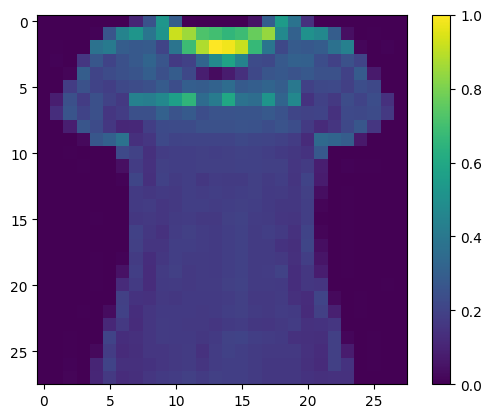

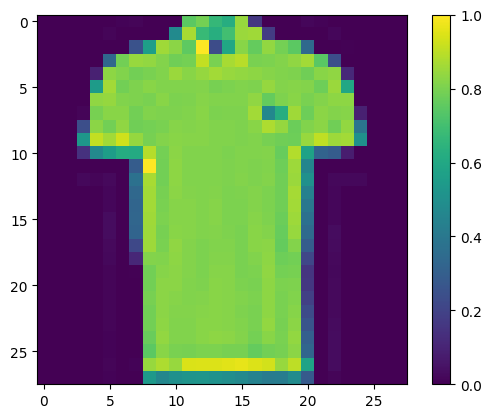

1.0


In [22]:
# Array index
this_pair = 8

# Show images at this index
show_image(ts_pairs[this_pair][0])
show_image(ts_pairs[this_pair][1])

# Print the label for this pair
print(ts_y[this_pair])

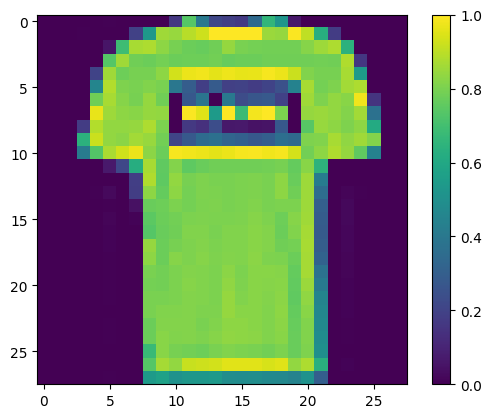

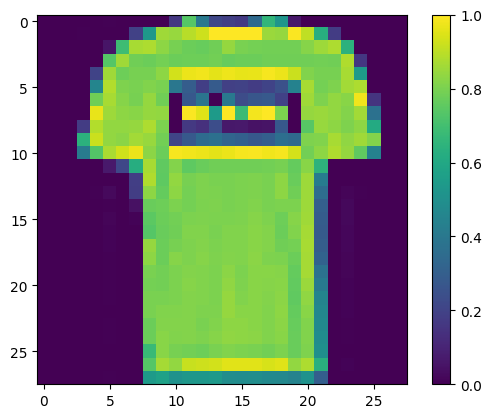

1.0



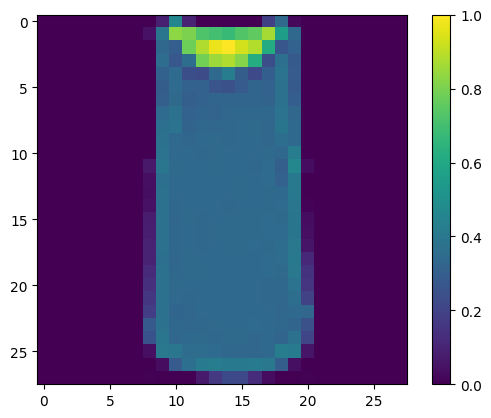

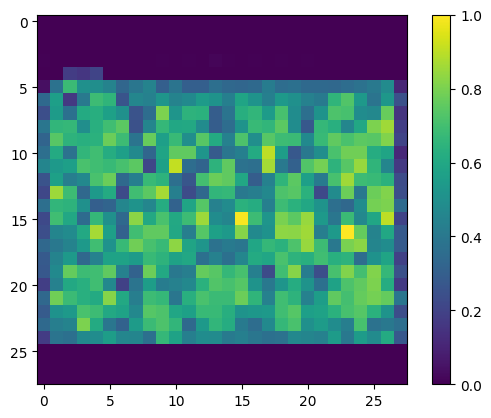

0.0


In [30]:
# Print other pairs
show_image(tr_pairs[:,0][0])
show_image(tr_pairs[:,0][1])
print(ts_y[0])

print()

show_image(tr_pairs[:,1][0])
show_image(tr_pairs[:,1][1])
print(ts_y[1])

# Build the Model

In [ ]:
def initialize_base_network():
  input = Input(shape = (28,28),
                name = 'base_input')
  x = Flatten(name = 'flatten_input')(input)